In [1]:
import pandas as pd
import numpy as np

In [2]:
casos = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [3]:
casos.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057


In [4]:
casos.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208,2218137,2233287
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,299971,300587,301203,301630,301924,302569,303266,304002,304353,304656
279,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,227552,227961,228179,228254,228541,228776,228943,229096,229333,229415


In [5]:
casos.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
1/25/22             int64
1/26/22             int64
1/27/22             int64
1/28/22             int64
1/29/22             int64
Length: 743, dtype: object

In [6]:
casos.sample()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,1446,1450,1451,1453,1453,1453,1453,1453,1453,1454


In [7]:
casos.shape

(280, 743)

In [8]:
casos.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22
count,278.000000,278.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02
mean,20.156042,21.788955,1.989286,2.339286,3.360714,5.121429,7.564286,10.453571,19.921429,22.025000,...,1.224212e+06,1.237926e+06,1.247512e+06,1.256100e+06,1.268536e+06,1.281806e+06,1.295234e+06,1.308184e+06,1.321271e+06,1.330548e+06
std,25.283318,76.200169,26.590143,26.687678,33.225879,46.244243,64.627991,87.077220,213.666694,214.980193,...,5.268299e+06,5.326903e+06,5.358841e+06,5.391538e+06,5.447711e+06,5.494231e+06,5.544259e+06,5.584359e+06,5.633429e+06,5.658137e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.643279,-37.713675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.196000e+03,7.265000e+03,7.265000e+03,7.265000e+03,7.280500e+03,7.423750e+03,7.583000e+03,7.588000e+03,7.595000e+03,7.605250e+03
50%,21.517170,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.275700e+04,6.312100e+04,6.326350e+04,6.340000e+04,6.398450e+04,6.418100e+04,6.445550e+04,6.506300e+04,6.582650e+04,6.592150e+04
75%,40.393350,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.701288e+05,5.835312e+05,5.923555e+05,6.022498e+05,6.050765e+05,6.117870e+05,6.231132e+05,6.331460e+05,6.452415e+05,6.519690e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.941776e+07,7.023992e+07,7.052604e+07,7.088171e+07,7.178348e+07,7.233344e+07,7.298065e+07,7.342426e+07,7.406711e+07,7.423611e+07


## CASOS COVID-19 NO MUNDO

In [9]:
casos.iloc[:, 4: casos.shape[1]]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22
0,0,0,0,0,0,0,0,0,0,0,...,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290
1,0,0,0,0,0,0,0,0,0,0,...,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126
2,0,0,0,0,0,0,0,0,0,0,...,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310
3,0,0,0,0,0,0,0,0,0,0,...,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556
4,0,0,0,0,0,0,0,0,0,0,...,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,2,2,2,2,2,2,2,2,2,...,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208,2218137,2233287
276,0,0,0,0,0,0,0,0,0,0,...,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992
277,0,0,0,0,0,0,0,0,0,0,...,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942
278,0,0,0,0,0,0,0,0,0,0,...,299971,300587,301203,301630,301924,302569,303266,304002,304353,304656


In [10]:
casos = np.sum(casos.iloc[:, 4:casos.shape[1]])
casos.index = pd.DatetimeIndex(casos.index)
casos.tail(10)

2022-01-20    342779475
2022-01-21    346619420
2022-01-22    349303349
2022-01-23    351707981
2022-01-24    355189967
2022-01-25    358905541
2022-01-26    362665460
2022-01-27    366291433
2022-01-28    369955862
2022-01-29    372553400
dtype: int64

<AxesSubplot:title={'center':'CASOS NO MUNDO'}>

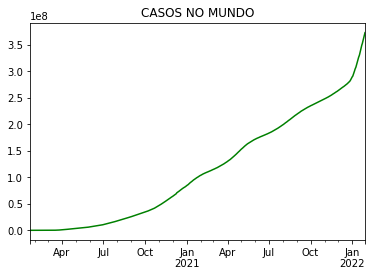

In [26]:
casos.plot(title='CASOS NO MUNDO', color='green')

## MORTES POR COVID-19 NO MUNDO

In [13]:
mortes = pd.read_csv('time_series_covid19_deaths_global.csv')

In [14]:
mortes.shape

(280, 743)

In [16]:
mortes = np.sum(mortes.iloc[:, 4 : mortes.shape[1]])
mortes.index = pd.DatetimeIndex(mortes.index)
mortes.tail()

2022-01-25    5617532
2022-01-26    5628425
2022-01-27    5638742
2022-01-28    5650738
2022-01-29    5658543
dtype: int64

<AxesSubplot:title={'center':'MORTES NO MUNDO'}>

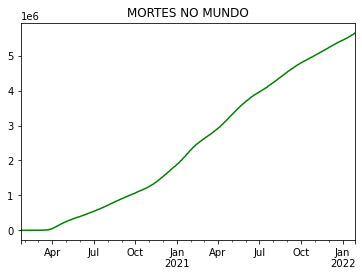

In [27]:
mortes.plot(title='MORTES NO MUNDO', color='green')

<AxesSubplot:title={'center':'MORTALIDADE NO MUNDO'}>

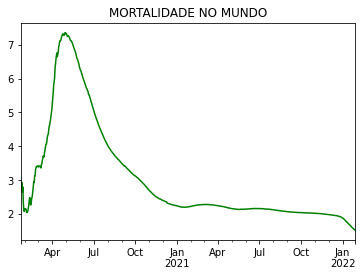

In [28]:
 mortalidade.plot(title='MORTALIDADE NO MUNDO', color='green')

## MORTALIDADE

In [20]:
mortalidade = (mortes/casos) * 100

## CASOS RECUPERADOS

In [29]:
recuperados = pd.read_csv('time_series_covid19_recovered_global.csv')

In [31]:
recuperados.shape

(265, 743)

In [32]:
recuperados = np.sum(recuperados.iloc[:, 4 : recuperados.shape[1]])
recuperados.index = pd.DatetimeIndex(recuperados.index)
recuperados.tail()

2022-01-25    0
2022-01-26    0
2022-01-27    0
2022-01-28    0
2022-01-29    0
dtype: int64

<AxesSubplot:title={'center':'CASOS RECUPERADOS'}>

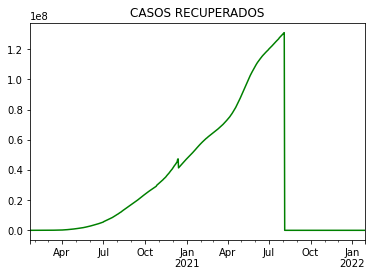

In [35]:
recuperados.plot(title='CASOS RECUPERADOS', color='green')